In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [203]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [204]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [205]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [206]:
# Define a base class for your models
Base = automap_base()

# Reflect the tables from the database
Base.prepare(engine)

In [207]:
# View all of the classes that automap found
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [208]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [209]:
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

# Create the SQLAlchemy engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite") 

# Create a session
session = Session(engine)

# Use the session to interact with the database
# ...

# Close the session
session.close()

# Exploratory Precipitation Analysis

In [210]:
# Find the most recent date in the data set.
from sqlalchemy import func

session = Session(engine)

most_recent_data = session.query(func.max(measurement.date)).scalar()

session.close()

print("Most recent date:", most_recent_data)

Most recent date: 2017-08-23


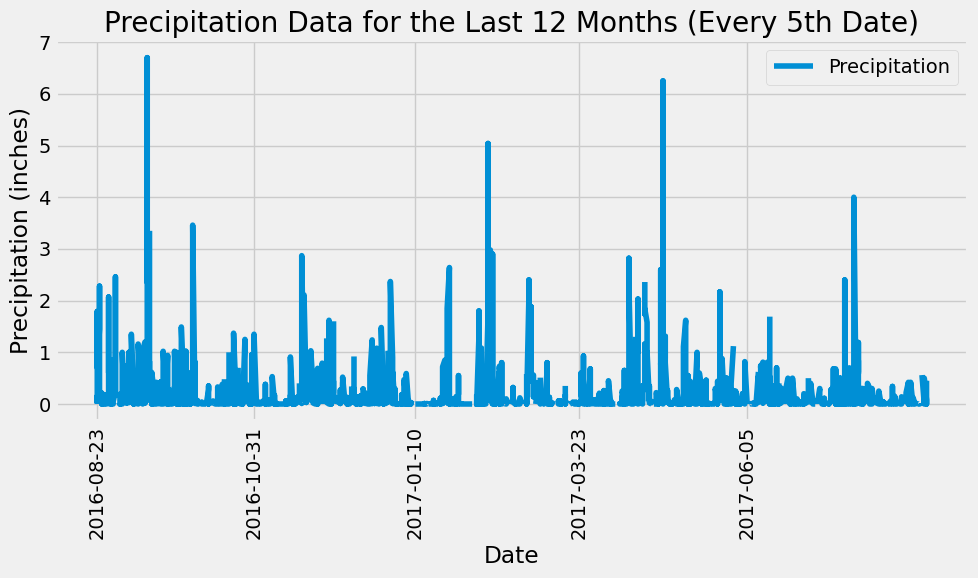

In [211]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#one_year_ago = pd.to_datetime
most_recent_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago_str)\
    .order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation')

# Nth date work:
n = len(precipitation_df) // 5
selected_dates = precipitation_df.iloc[::n, 0]

plt.xticks(selected_dates, rotation=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data for the Last 12 Months (Every 5th Date)')
plt.legend()
plt.tight_layout()
plt.show()


In [212]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df['Precipitation'].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [213]:
from sqlalchemy import func

# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Station.station))).scalar()
print("Total number of stations:", total_stations)

Total number of stations: 9


In [214]:
from sqlalchemy import desc

# Design a query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(desc(func.count(Measurement.station))).all()

# Print the stations and their counts in descending order
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [215]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Extract the most active station ID from the previous query
most_active_station = active_stations[0][0]

# Design a query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station).all()

# Extract the temperature statistics
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"For station {most_active_station}:")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp}")


For station USC00519281:
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


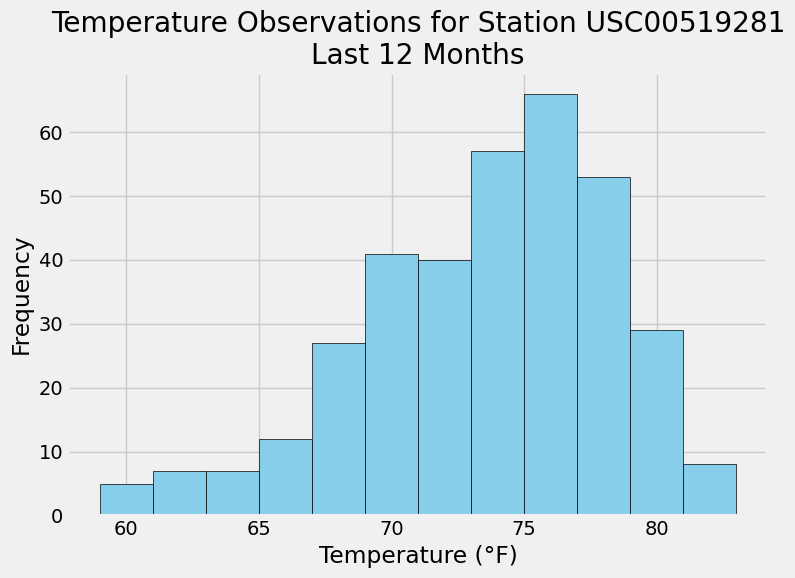

In [216]:
from sqlalchemy import func
from datetime import datetime, timedelta

# Determine the most active station ID
most_active_station = active_stations[0][0]

# Calculate the date one year ago from the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - timedelta(days=365)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs)\
    .filter(Measurement.station == most_active_station)\
    .filter(Measurement.date >= one_year_ago_str).all()

# Extract temperature values from the query result
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}\nLast 12 Months')
plt.grid(True)
plt.tight_layout()
plt.show()


# Close Session

In [217]:
# Close Session
session.close()